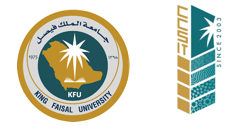

<h1><center>
King Faisal University <br>
College of Computer Sciences and Information Technology <br>
CS324: Artificial Intelligence – Practical Class 
</h1>


<strong>
<center>[0921 - 324]: [Artificial Intelligence]
<br><br>
<center>Section: [Male/Female]
<br><br><br><br>

<center>Lab [04]: [Informed Search]
<br><br><br><br>

<center> Date: []
<center> Time: []
<br><br>


<center> Instructor: []
</strong>

# Introduction
In the previous lab session, several search strategies that come under the heading of uninformed search (also called blind search) were discussed. These strategies have no additional information about states beyond that provided in the problem definition. All they can do is generate successors and distinguish a goal state from a non-goal state. 

**Informed Search Strategies** <br>
This lab session covers advanced search strategies that use problem-specific knowledge beyond the definition of the problem itself. Such strategies have the ability to know whether one non-goal state is “more promising” than another, and they are called informed search or heuristic search strategies. The term “informed” means that the strategies are informed (or have information) about states beyond that provided in the problem definition. This lab shows how an informed search strategy can find solutions more efficiently than can an uninformed strategy. Examples of informed search strategies are: 
* Best-first search as the general approach. 
* A-star (A*) search 
* Greedy best first search




**Objectives: **
* Implement Informed Search Algorithm such as A* and greedy best first search 
* Use Informed Search Algorithm in Solving problems

**Tools/Software Requirement:**
*	Anaconda Navigator


**Lab Activity Description:**

Part 1: Implementing Informed Search Algorithm
* A* Search Algorithm  

Part 2: Lab Task.
*	Student solves programming questions using Informed Search Algorithm (greedy best first search)



## Part 1: Implementing Informed Search Algorithms

### 1. Best-first search as the general approach. 
Best-first search is an instance of the general search algorithm in which a node is selected for expansion based on an evaluation function f(n) so the node with the lowest evaluation is expanded first. The choice of f determines the search strategy.  Most best-first algorithms include as a component of f a heuristic function, denoted h(n): 

*h(n) = estimated cost of the cheapest path from the state at node n to a goal state.*  

### 2. Greedy best-first search approach. 
Greedy best-first search tries to expand the node that is closest to the goal, on the grounds that this is likely to lead to a solution quickly. Thus, it evaluates nodes by using just the heuristic function; that is,  <br>
*f(n) = h(n).*


### 3. A* search approach. 
It evaluates nodes by combining *g(n)*, the cost to reach the node, and *h(n)*, the cost to get from the node to the goal: <br>

** *f(n) = g(n) + h(n)* **  

Since *g(n)* gives the path cost from the start node to node n, and *h(n)* is the estimated cost of the cheapest path from n to the goal, we have: 

** *f(n) = estimated cost of the cheapest solution through n* **  

Thus, if we are trying to find the cheapest solution, a reasonable thing to try first is the node with the lowest value of *g(n) + h(n)*. It turns out that this strategy is more than just reasonable: provided that the heuristic function h(n) satisfies certain conditions, A∗ search is both complete and optimal.


#### A* Implementation


Figure 1. Graph for A*

![AI_Lab_04_Graph.png](AI_Lab_04_Graph.png)

#### Construct a simple graph, as an adjacency list:

In [33]:
graph ={
    #key = vertix 
    #value = dictionarty where the key is adjacent node and its value is list[g-score, h-score]
    'A': {'B':[2,2],'C':[3,2]},
    'B': {'D':[4,4],'E':[1,1]},
    'C': {'F':[2,0]},
    'D': {},
    'E': {'F':[1,0]},
    'F': {}
}

In [34]:
import heapq #priority queue algorithm 

In [35]:
def astar(graph, start_node, goal_node):
    # astar: f()= g() + h()
    # f() as f_distance
    # g() as g_distance 
    # h() as heuristic    
    f_distance={node:float('inf') for node in graph} #initially f is set to infinity 
    f_distance[start_node] = 0  
    
    g_distance={node:float('inf') for node in graph} #initially f is set to infinity 
    g_distance[start_node] = 0
    
    parent={node:None for node in graph}
    parent[start_node] = None
    
    priority_queue=[(0, start_node)] #0 (f(n)) is the priority of the node -   
    
    while priority_queue: #Loop while the queue is not empty 
        current_f_distance, current_node = heapq.heappop(priority_queue) #Pop and return the smallest item from the heap aka the node with highest priority

        if current_node == goal_node: 
            print('found the goal_node')
            return f_distance, parent #parent for the path 
    
        for next_node, weights in graph[current_node].items(): #All the adjacent nodes            
            temp_g_distance = g_distance[current_node] + weights[0]  

            if temp_g_distance < g_distance[next_node]:                
                g_distance[next_node] = temp_g_distance  
                heuristic = weights[1]                
                f_distance[next_node] = temp_g_distance + heuristic
                parent[next_node] = current_node
                
            heapq.heappush(priority_queue,(f_distance[next_node], next_node)) #Push the value item onto the heap, maintaining the heap invariant

    return f_distance, parent

#### Search Node F starting from Node A


In [36]:
start_node = 'A'
goal_node = 'F'
f_distance, parent = astar(graph, start_node, goal_node)

found the goal_node


In [37]:
def print_path(f_distance, parent, start_node, goal_node):
    node = goal_node
    path = []
    while node != None:
        path.append(node)
        node = parent[node]
    path.reverse()
    print("The path is: ", path)
print_path(f_distance, parent, start_node, goal_node)

The path is:  ['A', 'B', 'E', 'F']


## Part 2: Lab Task

### Lab Task 1
Assume the intial node is 'A' and you want to reach node 'F'. Implement the solution of the given problem using Greedy-best first search?

![AI_Lab_04_Graph_Lab_task1.png](AI_Lab_04_Graph_Lab_taks1.png)



In [45]:
#Write your code here
graph = {
    'A': {'B':[1,1]},
    'B': {'C':[2,2], 'D':[1,2]},
    'C': {'E':[1,1]},
    'D': {'F':[2,0]},
    'E': {'D':[3,2], 'F':[1,0]},
}

def dfs(graph, start, end , path=[]):
    print(path)
    if start == end:
        return path
    min = float('inf')
    current_node = None
    for node in graph[start].items():
        if min > node[1][1]:
            min = node[1][1]
            current_node = node[0]
    
    return dfs(graph, current_node, end, path + [current_node])
dfs(graph, 'A', 'F', path=['A'])

['A']
['A', 'B']
['A', 'B', 'C']
['A', 'B', 'C', 'E']
['A', 'B', 'C', 'E', 'F']


['A', 'B', 'C', 'E', 'F']

### Lab Task 2

Solve the problem given in Task 1 using A* search. Then compare between A* and greedy in terms of: 

* What are the paths given by A* and greedy best first search? 
* What is the path cost of each algorithm? Which algorithm gives a better solution?
* Formulate the problem formally by defining: initial state,  possible actions,  transition model, goal test, and path cost. 

In [39]:
import heapq

Write your solution here


In [43]:
graph = {
    'A': {'B':[1,1]},
    'B': {'C':[2,2], 'D':[1,2]},
    'C': {'E':[1,1]},
    'D': {'F':[2,0]},
    'E': {'D':[3,2], 'F':[1,0]},
    'F': {}
}
def astar(graph, start_node, goal_node):
    # astar: f()= g() + h()
    # f() as f_distance
    # g() as g_distance 
    # h() as heuristic    
    f_distance={node:float('inf') for node in graph} #initially f is set to infinity 
    f_distance[start_node] = 0  
    
    g_distance={node:float('inf') for node in graph} #initially f is set to infinity 
    g_distance[start_node] = 0
    
    parent={node:None for node in graph}
    parent[start_node] = None
    
    priority_queue=[(0, start_node)] #0 (f(n)) is the priority of the node -   
    
    while priority_queue: #Loop while the queue is not empty 
        current_f_distance, current_node = heapq.heappop(priority_queue) #Pop and return the smallest item from the heap aka the node with highest priority

        if current_node == goal_node: 
            print('found the goal_node')
            return f_distance, parent #parent for the path 
    
        for next_node, weights in graph[current_node].items(): #All the adjacent nodes            
            temp_g_distance = g_distance[current_node] + weights[0]  

            if temp_g_distance < g_distance[next_node]:                
                g_distance[next_node] = temp_g_distance  
                heuristic = weights[1]                
                f_distance[next_node] = temp_g_distance + heuristic
                parent[next_node] = current_node
                
            heapq.heappush(priority_queue,(f_distance[next_node], next_node)) #Push the value item onto the heap, maintaining the heap invariant

    return f_distance, parent

start_node = 'A'
goal_node = 'F'
f_distance, parent = astar(graph, start_node, goal_node)
def print_path(f_distance, parent, start_node, goal_node):
    node = goal_node
    path = []
    while node != None:
        path.append(node)
        node = parent[node]
    path.reverse()
    print("The path is: ", path)
print_path(f_distance, parent, start_node, goal_node)


found the goal_node
The path is:  ['A', 'B', 'D', 'F']
